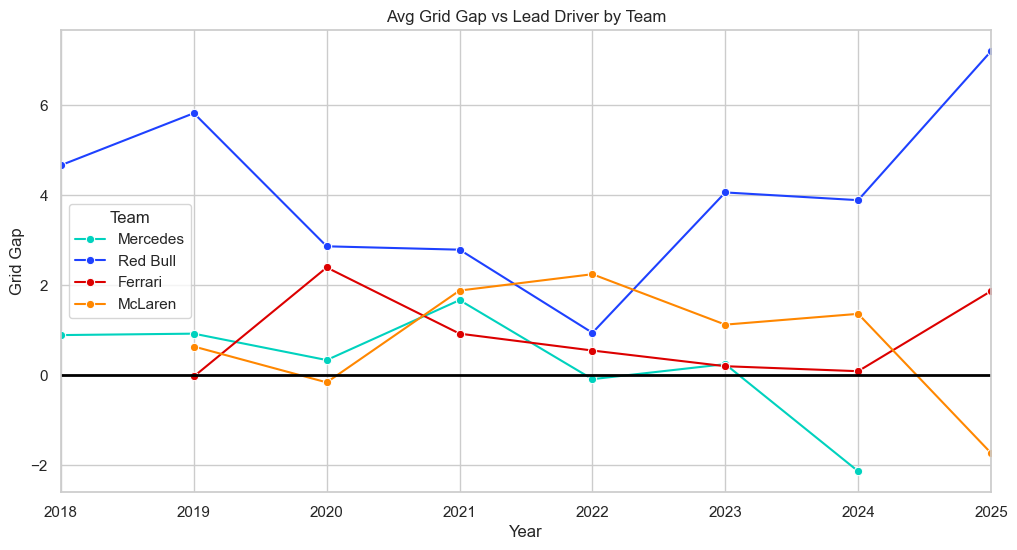

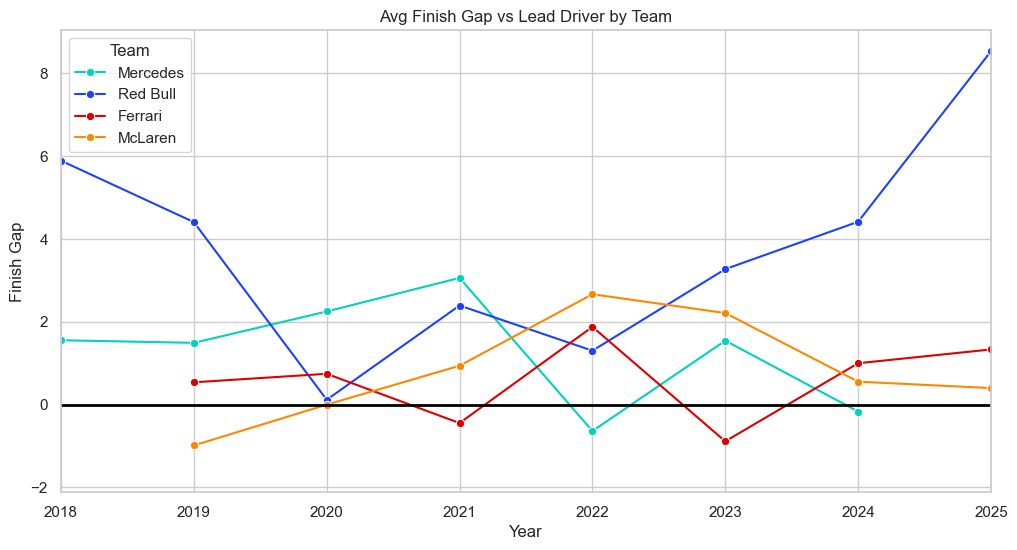

AvgQualiGap                               AvgFinishGap            \
CoreTeam     Ferrari   McLaren  Mercedes  Red Bull      Ferrari   McLaren   
Year                                                                        
2013             NaN       NaN  4.375940       NaN          NaN       NaN   
2014             NaN       NaN  0.694737       NaN          NaN       NaN   
2015             NaN       NaN  0.315789       NaN          NaN       NaN   
2016             NaN       NaN -1.555556 -1.254902          NaN       NaN   
2017             NaN       NaN -0.166667  1.100000          NaN       NaN   
2018             NaN       NaN  0.888889  4.666667          NaN       NaN   
2019       -0.031746  0.634921  0.920635  5.823129     0.539683 -0.984127   
2020        2.392157 -0.163265  0.333333  2.862745     0.745098  0.000000   
2021        0.920635  1.878788  1.666667  2.787879    -0.444444  0.939394   
2022        0.545455  2.242424 -0.090909  0.939394     1.878788  2.666667   
2023        0.196721  1.121212  0.242424  4.060606    -0.885246  2.212121   
2024        0.085714  1.361111 -2.138889  3.888889     1.000000  0.555556   
2025        1.866667 -1.733333       NaN  7.200000     1.333333  0.400000   

                              
CoreTeam  Mercedes  Red Bull  
Year                          
2013      2.496241       NaN  
2014      1.326316       NaN  
2015      0.842105       NaN  
2016     -0.571429 -1.607843  
2017      0.833333 -1.000000  
2018      1.555556  5.891156  
2019      1.492063  4.408163  
2020      2.250000  0.117647  
2021      3.060606  2.393939  
2022     -0.636364  1.303030  
2023      1.545455  3.272727  
2024     -0.166667  4.416667  
2025           NaN  8.533333

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

team_colors = {
    'Red Bull': '#1E41FF',
    'Ferrari': '#DC0000',
    'Mercedes': '#00D2BE',
    'McLaren': '#FF8700'
}
lead_drivers = {
    'Red Bull': 'Max Verstappen',
    'Ferrari': 'Charles Leclerc',
    'Mercedes': 'Lewis Hamilton',
    'McLaren': 'Lando Norris'
}

mid_drivers = ['Pierre Gasly', 'Alexander Albon', 'Sergio Perez', 'Yuki Tsunoda', 'Liam Lawson', 'Daniel Ricciardo']
driver_colors = {
    'Pierre Gasly': '#FFC0CB',       
    'Alexander Albon': '#89CFF0',    
    'Sergio Perez': '#00008B',       
    'Yuki Tsunoda': '#ED1E36',      
    'Liam Lawson': '#FABB23',        
    'Daniel Ricciardo': '#1E41FF'
}

df = pd.read_csv("ALLTEAMSQvFDetail2016.csv")
df['CoreTeam'] = df['Team'].apply(lambda x: next((t for t in lead_drivers if t in x), np.nan))
df = df[df['CoreTeam'].notna()].copy()
df['QualiPos'] = pd.to_numeric(df['gridPos'], errors='coerce')
df['RawFinish'] = df['raceResult'].astype(str)
df['FinishPos'] = pd.to_numeric(df['RawFinish'].replace({'DNF': np.nan, 'DSQ': np.nan}), errors='coerce')
max_pos = df['FinishPos'].max()
df['FinishPos'] = df['FinishPos'].fillna(max_pos+1)
dupe = pd.merge(df, df, on=['Year','CoreTeam','raceName'], suffixes=('','_tm'))
dupe['LeadDriver'] = dupe['CoreTeam'].map(lead_drivers)
lead_pairs = dupe[(dupe['Driver']==dupe['LeadDriver']) | (dupe['Driver_tm']==dupe['LeadDriver'])]
def orient_pair(row):
    if row['Driver_tm']==row['LeadDriver']:
        for col in ['Driver','gridPos','QualiPos','RawFinish','FinishPos']:
            row[col], row[f"{col}_tm"] = row[f"{col}_tm"], row[col]
    return row
lead_pairs = lead_pairs.apply(orient_pair, axis=1)
lead_pairs['Teammate'] = lead_pairs['Driver_tm']
lead_pairs['QualiGap'] = lead_pairs['QualiPos_tm'] - lead_pairs['QualiPos']
lead_pairs['FinishGap'] = lead_pairs['FinishPos_tm'] - lead_pairs['FinishPos']
gap_metrics = (lead_pairs.groupby(['Year','CoreTeam'])
               .agg(AvgQualiGap=('QualiGap','mean'),
                    AvgFinishGap=('FinishGap','mean'),
                    NumRaces=('raceName','nunique'))
               .reset_index())
years = list(range(2018,2026))
pal_tm = {t: team_colors[t] for t in team_colors}

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=gap_metrics, x='Year', y='AvgQualiGap', hue='CoreTeam', marker='o', palette=pal_tm)
ax.set_title('Avg Grid Gap vs Lead Driver by Team')
ax.set_xlim(2018,2025)
ax.set_xticks(years)
ax.set_ylabel('Grid Gap')
ax.set_xlabel('Year')
ticks = ax.get_yticks()
ax.axhline(0, color='black', linewidth=2)
plt.legend(title='Team')
plt.show()

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=gap_metrics, x='Year', y='AvgFinishGap', hue='CoreTeam', marker='o', palette=pal_tm)
ax.set_title('Avg Finish Gap vs Lead Driver by Team')
ax.set_xlim(2018,2025)
ax.set_xticks(years)
ax.set_ylabel('Finish Gap')
ax.set_xlabel('Year')
ax.axhline(0, color='black', linewidth=2)
plt.legend(title='Team')
plt.show()
tbl_core = gap_metrics[gap_metrics['Year'].between(2013,2025)]
tbl_core.pivot(index='Year', columns='CoreTeam', values=['AvgQualiGap','AvgFinishGap'])



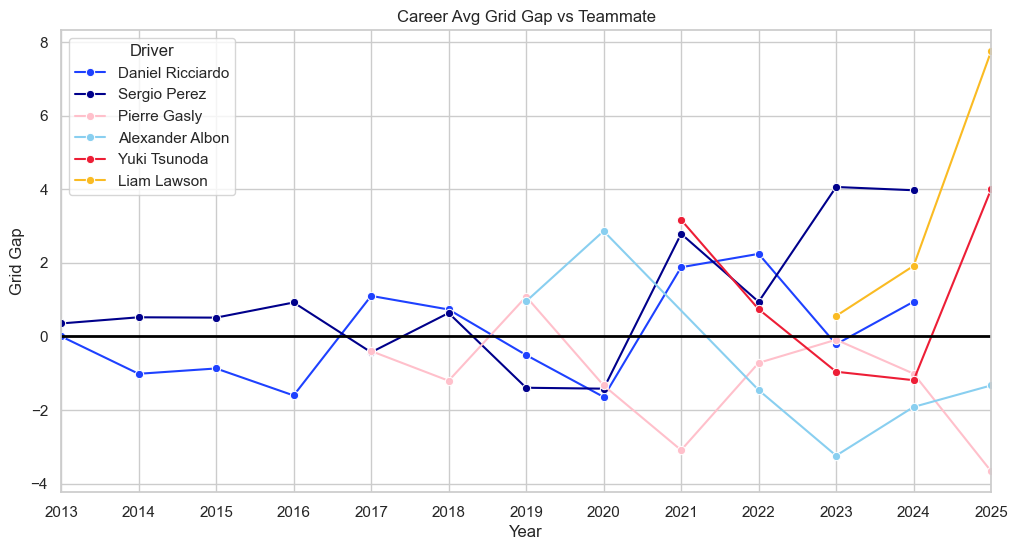

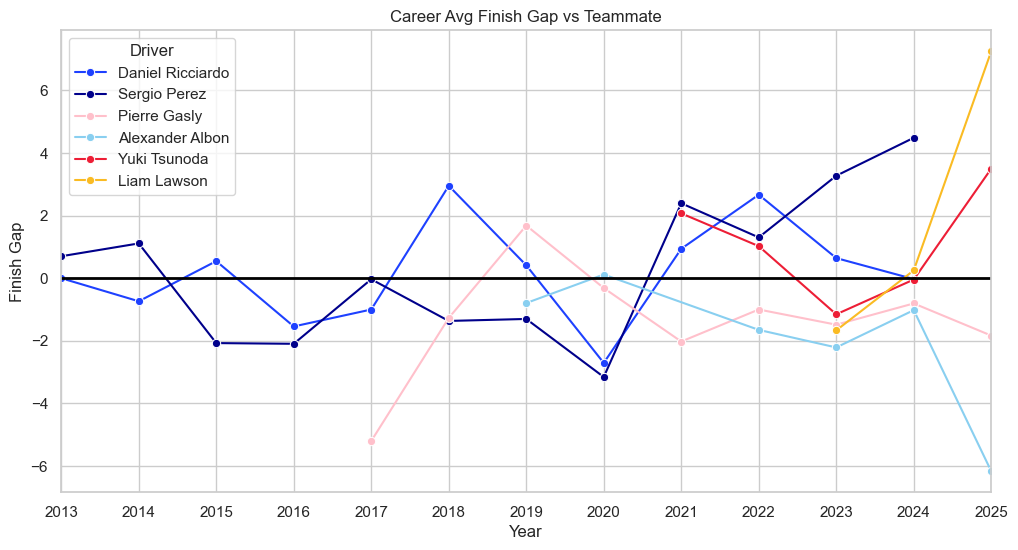

AvgQualiGap                                                         \
Driver Alexander Albon Daniel Ricciardo Liam Lawson Pierre Gasly Sergio Perez   
Year                                                                            
2011               NaN         0.000000         NaN          NaN     0.000000   
2012               NaN         0.000000         NaN          NaN     0.000000   
2013               NaN         0.000000         NaN          NaN     0.350877   
2014               NaN        -1.017544         NaN          NaN     0.518519   
2015               NaN        -0.872727         NaN          NaN     0.509091   
2016               NaN        -1.606557         NaN          NaN     0.920635   
2017               NaN         1.100000         NaN    -0.400000    -0.433333   
2018               NaN         0.730159         NaN    -1.206349     0.634921   
2019          0.952381        -0.507937         NaN     1.079365    -1.396825   
2020          2.862745        -1.647059         NaN    -1.333333    -1.422222   
2021               NaN         1.878788         NaN    -3.093023     2.787879   
2022         -1.460317         2.242424         NaN    -0.720930     0.939394   
2023         -3.242424        -0.214286    0.555556    -0.090909     4.060606   
2024         -1.918367         0.942857    1.916667    -1.014925     3.971429   
2025         -1.333333              NaN    7.750000    -3.666667          NaN   

                       AvgFinishGap                                            \
Driver Yuki Tsunoda Alexander Albon Daniel Ricciardo Liam Lawson Pierre Gasly   
Year                                                                            
2011            NaN             NaN         0.000000         NaN          NaN   
2012            NaN             NaN         0.000000         NaN          NaN   
2013            NaN             NaN         0.000000         NaN          NaN   
2014            NaN             NaN        -0.736842         NaN          NaN   
2015            NaN             NaN         0.545455         NaN          NaN   
2016            NaN             NaN        -1.540984         NaN          NaN   
2017            NaN             NaN        -1.000000         NaN    -5.200000   
2018            NaN             NaN         2.952381         NaN    -1.269841   
2019            NaN       -0.793651         0.412698         NaN     1.682540   
2020            NaN        0.117647        -2.705882         NaN    -0.313725   
2021       3.166667             NaN         0.939394         NaN    -2.023256   
2022       0.738095       -1.650794         2.666667         NaN    -1.000000   
2023      -0.961538       -2.212121         0.642857   -1.666667    -1.484848   
2024      -1.191489       -1.020408        -0.028571    0.250000    -0.805970   
2025       4.000000       -6.166667              NaN    7.250000    -1.833333   

                                  
Driver Sergio Perez Yuki Tsunoda  
Year                              
2011       0.000000          NaN  
2012       0.000000          NaN  
2013       0.701754          NaN  
2014       1.111111          NaN  
2015      -2.072727          NaN  
2016      -2.095238          NaN  
2017      -0.033333          NaN  
2018      -1.365079          NaN  
2019      -1.301587          NaN  
2020      -3.155556          NaN  
2021       2.393939     2.071429  
2022       1.303030     1.023810  
2023       3.272727    -1.153846  
2024       4.485714    -0.042553  
2025            NaN     3.500000

In [ ]:

df_all = pd.read_csv("ALLTEAMSQvFDetail2016.csv")
df_all['QualiPos'] = pd.to_numeric(df_all['gridPos'], errors='coerce')
df_all['RawFinish'] = df_all['raceResult'].astype(str)
finite_fin_all = pd.to_numeric(df_all['RawFinish'].replace({'DNF': np.nan, 'DSQ': np.nan}), errors='coerce')
max_all = finite_fin_all.max()
df_all['FinishPos'] = finite_fin_all.fillna(max_all+1)
pairs_all = pd.merge(df_all, df_all, on=['Year','Team','raceName'], suffixes=('','_tm'))
pairs_sel = pairs_all[(pairs_all['Driver'].isin(mid_drivers)) | (pairs_all['Driver_tm'].isin(mid_drivers))].copy()
def orient_mid(row):
    if row['Driver_tm'] in mid_drivers:
        for col in ['Driver','gridPos','QualiPos','RawFinish','FinishPos']:
            row[col], row[f"{col}_tm"] = row[f"{col}_tm"], row[col]
    return row
pairs_sel = pairs_sel.apply(orient_mid, axis=1)
pairs_sel['QualiGap'] = pairs_sel['QualiPos'] - pairs_sel['QualiPos_tm']
pairs_sel['FinishGap'] = pairs_sel['FinishPos'] - pairs_sel['FinishPos_tm']
career_metrics = (pairs_sel.groupby(['Year','Driver'])
                  .agg(AvgQualiGap=('QualiGap','mean'),
                       AvgFinishGap=('FinishGap','mean'),
                       Races=('raceName','nunique'))
                  .reset_index())

yrs = list(range(2013,2026))

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=career_metrics, x='Year', y='AvgQualiGap', hue='Driver', marker='o', palette=driver_colors)
ax.set_title('Career Avg Grid Gap vs Teammate')
ax.set_xticks(yrs)
ax.set_xlim(2013,2025)
ax.set_ylabel('Grid Gap')
ax.set_xlabel('Year')
ax.axhline(0, color='black', linewidth=2)
plt.legend(title='Driver')
plt.show()

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=career_metrics, x='Year', y='AvgFinishGap', hue='Driver', marker='o', palette=driver_colors)
ax.set_title('Career Avg Finish Gap vs Teammate')
ax.set_xticks(yrs)
ax.set_xlim(2013,2025)
ax.set_ylabel('Finish Gap')
ax.set_xlabel('Year')
ax.axhline(0, color='black', linewidth=2)
plt.legend(title='Driver')
plt.show()

career_metrics.pivot(index='Year', columns='Driver', values=['AvgQualiGap','AvgFinishGap'])
